In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import numpy as np
import pandas as pd

from pandas.tools import plotting
import urllib.request
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器
from sklearn import cross_validation as cv

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
urllib.request.urlretrieve(url, 'pa-kinson.txt')

In [2]:
df = pd.read_csv('pa-kinson.txt', sep=',')

In [3]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
df.index = list(range(1, len(df.index)+1))

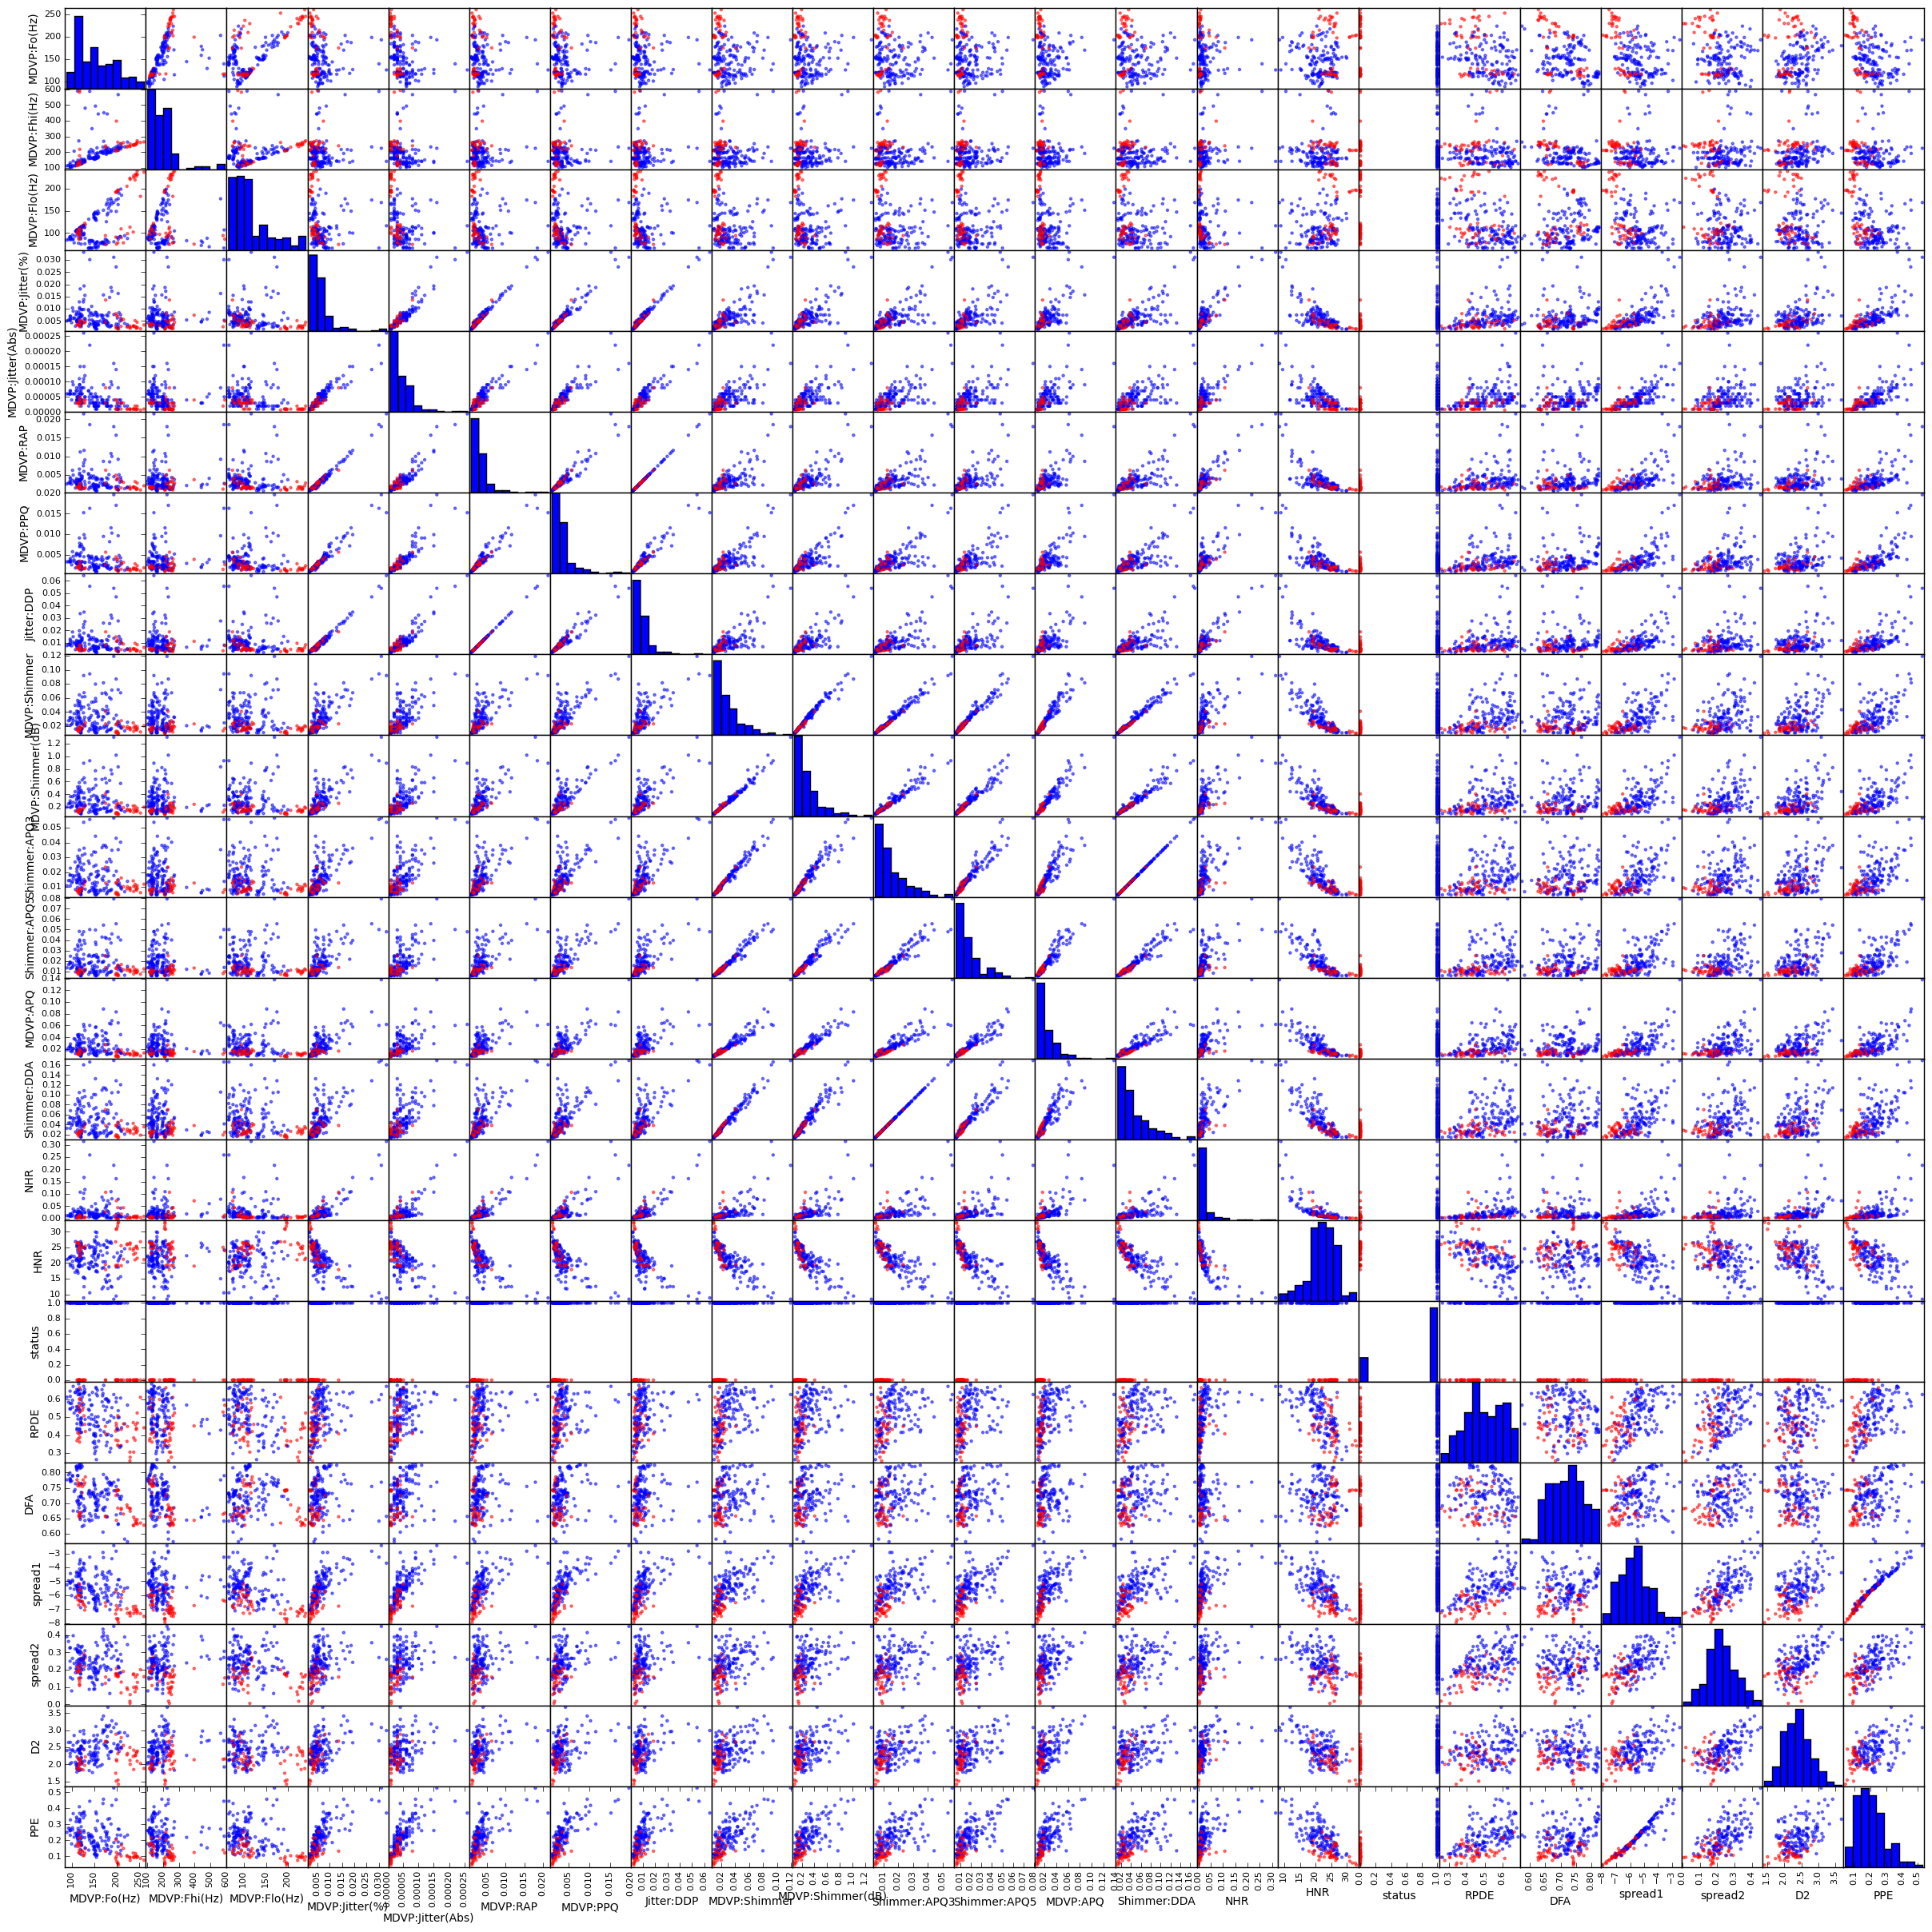

In [5]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -7]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -7])]
plotting.scatter_matrix(df[list(df.columns[:])], figsize=(30, 30), color=colors) 
plt.show()

赤が健康体、青がパーキンソン病の人であり、一部の散布図では分離できそうなことが読み取れる。

In [6]:
# 名前と評価値を抜くためのブーリアンを作成
libool = [True] * len(df.columns)
libool[-7] = False
libool[0] = False
# 行列の正規化
dfs = df.iloc[:, libool].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

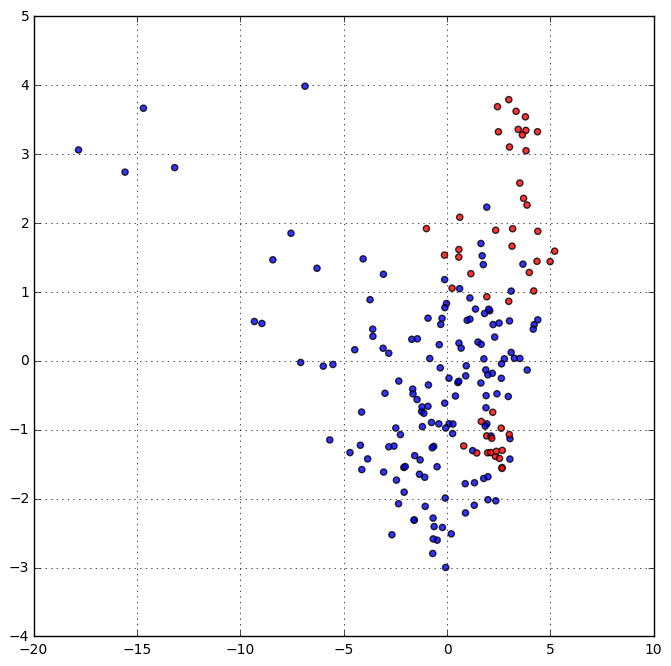

In [7]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -7]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -7])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, "", alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors)
plt.grid()
plt.show()

少し分離できているように思う。

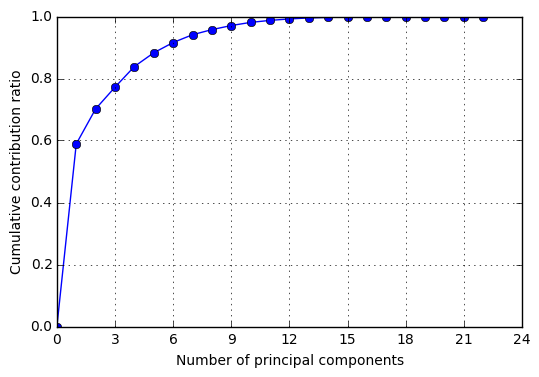

In [8]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

寄与率の比較的高い成分が半分ほどになったため、主成分分析はある程度有効であると考える

In [16]:
feature_names = df.columns[:-7]
target_names = list(set(df.iloc[:, -7]))
sample_names = df.index
data = df.iloc[:, libool]
target = df.iloc[:, -7]

In [17]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
7,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
8,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
9,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
10,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [11]:
target

1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
      ..
166    0
167    0
168    0
169    0
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    1
179    1
180    1
181    1
182    1
183    1
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
Name: status, dtype: int64

In [36]:
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

In [37]:
train_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
136,110.453,127.611,105.554,0.00494,0.000040,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
156,117.870,127.349,95.654,0.00647,0.000050,0.00356,0.00300,0.01067,0.03087,0.276,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
12,91.904,115.871,86.292,0.00540,0.000060,0.00281,0.00336,0.00844,0.02752,0.249,...,0.02214,0.04272,0.01141,21.414,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931
102,128.451,150.449,75.632,0.01551,0.000120,0.00905,0.00909,0.02716,0.06170,0.584,...,0.05174,0.09669,0.11843,15.060,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
48,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.00860,0.01841,0.00432,26.805,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
75,110.793,128.101,107.316,0.00494,0.000040,0.00260,0.00283,0.00780,0.02442,0.216,...,0.01831,0.04295,0.00479,25.438,0.437031,0.815908,-5.313360,0.201861,2.225815,0.244512
135,106.516,112.777,93.105,0.00589,0.000060,0.00291,0.00319,0.00873,0.04932,0.441,...,0.03651,0.08050,0.03031,17.060,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080
83,100.960,110.019,95.628,0.00606,0.000060,0.00351,0.00348,0.01053,0.02427,0.216,...,0.01751,0.04114,0.01237,20.536,0.554610,0.787896,-5.022288,0.146948,2.428306,0.264666
144,202.805,231.508,86.232,0.00370,0.000020,0.00189,0.00211,0.00568,0.01997,0.180,...,0.01506,0.03350,0.02010,18.687,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032
152,192.818,224.429,168.793,0.03107,0.000160,0.01800,0.01958,0.05401,0.11908,1.302,...,0.13778,0.16942,0.21713,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367


In [38]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1]},
    {'kernel': ['rbf'],     'C': [1], 'gamma': [1e-2]},      
    {'kernel': ['poly'],'C': [1], 'degree': [2]}]

In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1).fit(train_data, train_target)
# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.8673469387755102
elapsed_time:5.634704828262329


精度は85%ほどで時間は10秒以内である。  


In [40]:
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target
df['pred'] = pred_target
df.T

,84,114,80,189,7,108,116,18,167,29,...,1,62,132,148,42,85,184,149,41,183
test,1,1,1,0,1,1,1,1,0,1,...,1,0,1,1,1,1,0,1,1,1
pred,1,1,1,1,1,1,1,1,0,0,...,1,0,1,1,0,1,1,1,1,1


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
pd.DataFrame(cm)

,0,1
0,13,10
1,3,72


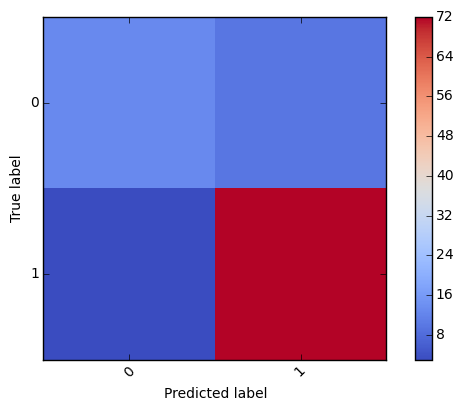

In [42]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

これを見るとパーキンソン病の人はきちんと判別できているが、健康な人に対しての誤診が多く、半分ほどいるとわかる。